## Tarea 2 - Física Computacional
**Román Tamez Vidal Tamayo Tamez** - (tamoaltas)

Agradecimientos a TeXForm de Mathematica.

In [2]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.special import erf, erfi

In [3]:
import matplotlib
# Para el formato de las gráficas
matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
        "font.size": 12,
        "pgf.preamble": "\n".join([ # Aún más formato
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        ])
    }
)

### Problema 1
Genere una función que calcule derivadas e integrales numéricas que consideren una precisión en la que se desprecien términos iguales o mayores a $h^5$ en el espaciado de la malla en el dominio de la función. Muestre que sus funciones trabajan bien con un ejemplo en el cual calcule su derivada e integral de forma analítica.

#### Derivada simétrica con error en $h^5$
$$
 f'_i \approx \frac{-f_{i+2} + 8 f_{i+1} - 8 f_{i-1} + f_{i-2}}{12 h}
$$

Parte asimétrica hacia adelante. Hacia atrás cambia el signo.

$$
 f'_{i} \approx \frac{-25 f_{i} + 48 f_{i+1} - 36 f_{i+2} + 16 f_{i+3} - 3 f_{i+4}}{12 h} 
$$

In [4]:
def derivada_h4(f, x):
    # Puntos intermedios
    h_12, df = 12*(x[1] - x[0]), np.zeros_like(f)
    for i in range(2,len(x)-2):
        df[i] = - f[i+2] + 8*f[i+1] - 8*f[i-1] + f[i-2]

    # Extremos del dominio
    df[0] = -25*f[0] + 48*f[1] - 36*f[2] + 16*f[3] - 3*f[4]
    df[1] = -25*f[1] + 48*f[2] - 36*f[3] + 16*f[4] - 3*f[5]
    df[-1] = 25*f[-1] - 48*f[-2] + 36*f[-3] - 16*f[-4] + 3*f[-5]
    df[-2] = 25*f[-2] - 48*f[-3] + 36*f[-4] - 16*f[-5] + 3*f[-6]

    return df / h_12

#### Integral con error en $h^5$

Integral
$$
 \int_{x_i-h}^{x_i + h} f(x) \, dx \approx \frac{f(x_{i-1})+4f(x_{i})+f(x_{i-1})}{3}h
$$

parte asimétrica

$$
 \int_{x_0}^{x_0 + h} f(x) \, dx \approx \frac{23 f(x_{0})+ 26f(x_{1}) - 4f(x_{2}) + 6f(x_{3}) - 3f(x_{4}) }{48}h
$$

In [5]:
def integral_h4(f, x):
    '''
    Regresa la integral de la función, no la primitiva
    '''
    int_f, h = 0, abs(x[0] - x[1])
    N = len(f)-1 #  Número de intervalos de integración [x_i, x_i+h]

    if len(f) < 5:
        raise Exception("Perdón. Ingresa una 'f' con al menos 5 valores") 

    for i in range(1,N,2):
        int_f += f[i+1] + 4*f[i] + f[i-1]
    int_f = int_f*h/3.0
    
    # Se agrega por separado la contribución del intervalo que queda solito.
    if N % 2 == 1: 
        int_f += -(23*f[-1] + 26*f[-2] - 4*f[-3] + 6*f[-4] -3*f[-5])*h/48.0 
        
    return int_f

In [6]:
# La integral real de una función a partir de una primitiva
def integral_primitiva(F,a,b):
    return np.real(F(b) - F(a))

#### Función elegida
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

$$
f'(x) = -\frac{x - \mu}{\sigma^2} f(x)
$$

$$
\int f(x)dx = \frac{1}{2} \operatorname{erf} \left( \frac{x - \mu}{\sqrt{2} \sigma} \right) + C
$$

In [7]:
# Primitiva de la distrubución normal
def norm_int(x,mu,sigma):
    return 0.5*sp.special.erf((x-mu)/(np.sqrt(2)*sigma))

Máximo error en la derivada: 5.015688983589506e-08


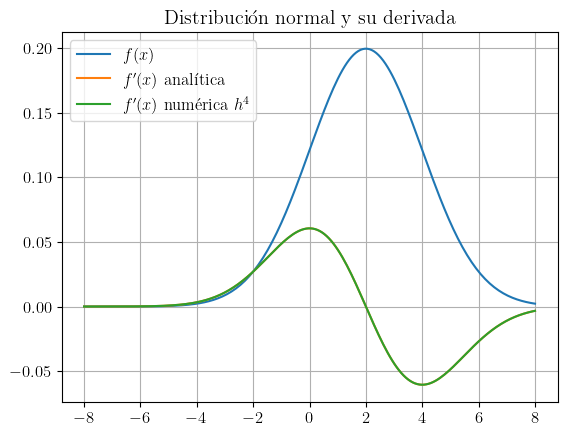

In [8]:
mu, sigma = 2, 2
x = np.linspace(-8,8,200)
y = sp.stats.norm.pdf(x,mu,sigma)

dy = -(x - mu)/(sigma**2) * y
dy_h4 = derivada_h4(y,x)
print('Máximo error en la derivada:', max(abs(dy-dy_h4)))

plt.title('Distribución normal y su derivada')
plt.plot(x,y ,label=r"$f(x)$")
plt.plot(x,dy ,label=r"$f'(x)$ analítica")
plt.plot(x,dy_h4, label=r"$f'(x)$ numérica $h^4$")
plt.grid(), plt.legend(),
plt.show()

In [12]:
x = np.linspace(0,4,6000)
y = sp.stats.norm.pdf(x,mu,sigma)

int_analitica = integral_primitiva(lambda x: norm_int(x,mu,sigma),0,4)
int_numerica = integral_h4(y,x)

print('Integral analítica:', int_analitica)
print('Integral numérica:', int_numerica)
print('Diferencia:',abs(int_numerica-int_analitica))

Integral analítica: 0.6826894921370859
Integral numérica: 0.6825281245360215
Diferencia: 0.0001613676010643328


### Problema 2

Calcule la derivada analítica de las siguientes funciones:


* $f(x) = e^{-(x/2)^4} \cos(4x)$ con $x \in [-5, 5]$.
* $g(x) = -\frac{2}{x^6} + \frac{1}{x^{12}}$ con $x \in [0.5, 5]$.

Realice las gráficas de las funciones y sus primeras dos derivadas. Utilizando los algoritmos vistos en clase (los que desprecian términos mayores a $O(h^2)$), encuentre la derivada numérica de dichas funciones con error menor a $10^{-4}$ para cualquier punto al comparar con las derivadas analíticas.

También realice una comparación utilizando la función derivada del problema anterior. Es decir, haga una gráfica en la que se muestre $|f'_\text{analítica}(x) - f'_\text{h2}(x)|$ y $|f'_\text{analítica}(x) - f'_\text{h4}(x)|$, así como para las segundas derivadas, y muestre que el error es menor a $10^{-4}$ en todo el intervalo con su valor de $h$ respectivo.

In [10]:
# Funciones
def func_f(x):
    return np.exp(-(x / 2) ** 2) * np.cos(4 * x)
def func_g(x):
    return -2 / x**6 + 1 / x**12

#### Derivadas analíticas
Para la primera función:
$$
f'(x) = -4 e^{-\frac{x^2}{4}} \sin (4 x)-\frac{1}{2} e^{-\frac{x^2}{4}} x \cos (4 x)
$$

$$
f''(x) = 4 e^{-\frac{x^2}{4}} x \sin (4 x)-16 e^{-\frac{x^2}{4}} \cos (4 x)+\left(\frac{1}{4} e^{-\frac{x^2}{4}}
   x^2-\frac{1}{2} e^{-\frac{x^2}{4}}\right) \cos (4 x)
$$
Para la segunda: 
$$
f'(x) = \frac{12}{x^7}-\frac{12}{x^{13}}
$$
$$
f''(x) = \frac{156}{x^{14}}-\frac{84}{x^8}
$$


In [38]:
# Derivadas de las funciones
def f_prima(x):
    return -4 * np.exp(-x**2 / 4) * np.sin(4 * x) - (1/2) * np.exp(-x**2 / 4) * x * np.cos(4 * x)

def f_bi_prima(x):
    return (4 * np.exp(-x**2 / 4) * x * np.sin(4 * x) - 16 * np.exp(-x**2 / 4) * np.cos(4 * x) +
            ((1/4) * np.exp(-x**2 / 4) * x**2 - (1/2) * np.exp(-x**2 / 4)) * np.cos(4 * x))

def g_prima(x):
    return 12 / x**7 - 12 / x**13

def g_bi_prima(x):
    return 156 / x**14 - 84 / x**8

#### Graficas de las funciones y sus derivadas analíticas

In [39]:
# Para graficar varias cosillas
def plotter (ax, x, funcs, labels=[]):
    if len(labels) != len(funcs):
        labels = [""]*len(funcs)

    for i in range(len(funcs)):
        ax.plot(x,funcs[i],label=labels[i])
    
    ax.legend(), ax.grid()

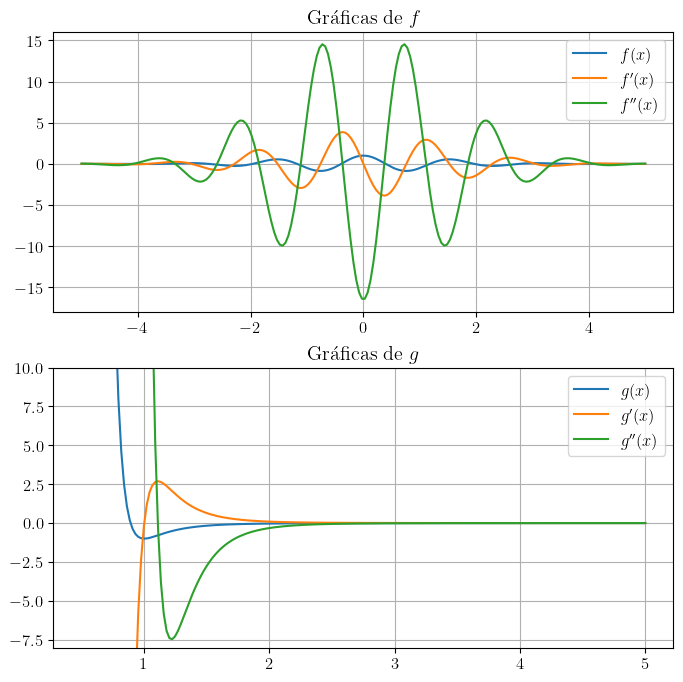

In [40]:
x1 = np.linspace(-5,5,200)
funcs_f = [func_f(x1), f_prima(x1), f_bi_prima(x1)]
labels_f = [r"$f(x)$", r"$f'(x)$" ,r"$f''(x)$"]
x2 = np.linspace(0.5,5,200)
funcs_g = [func_g(x2), g_prima(x2), g_bi_prima(x2)]
labels_g = [l.replace('f', 'g') for l in labels_f]  

fig, axes = plt.subplots(2, 1, figsize=(8, 8))
plotter(axes[0],x1,funcs_f, labels_f)
plotter(axes[1],x2,funcs_g,labels_g)

axes[0].set_title(r"Gráficas de $f$")
axes[1].set_title(r"Gráficas de $g$")
axes[1].set_ylim(-8,10)

plt.show()

#### Derivada simétrica con error en $h^3$
$$
 f'_i \approx \frac{f_{i+1}-f_{i-1}}{ 2 h}
$$

Derivadas asimétricas

$$
 f'_{0} \approx \frac{-3 f_{0} + 4 f_{1} - f_{2}}{2h} \,,\quad f'_{N}\approx \frac{3 f_{N} - 4 f_{N-1} + f_{N-2}}{2h}
$$

In [41]:
def derivada_h2(f, x):
    h_2, df = x[2] - x[0], np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i] = f[i+1] - f[i-1]

    df[0] = -f[2] + 4*f[1] - 3*f[0]
    df[-1] = f[-3] - 4*f[-2] + 3*f[-1]
    return df / h_2

#### Segunda derivada simétrica con error en $h^3$
$$
 f''_i \approx \frac{f_{i+1}- 2f_{i} + f_{i-1}}{h^2}
$$

Derivadas asimétricas
$$
 f''_{0} \approx \frac{2 f_{0} -5  f_{1} + 4 f_{2} - f_{3}}{h^2} \,,\quad f''_{N}\approx \frac{2 f_{N} -5  f_{N-1} + 4 f_{N-2} - f_{N-3}}{h^2}
$$

In [42]:
def segunda_derivada_h2(f, x):
    hh, ddf = (x[1] - x[0])**2, np.zeros_like(f)
    for i in range(1,len(x)-1):
        ddf[i] = f[i+1] - 2*f[i] + f[i-1]

    ddf[0] = 2*f[0] - 5*f[1] + 4*f[2] - f[3]
    ddf[-1] = 2*f[-1] - 5*f[-2] + 4*f[-3] - f[-4]
    return ddf / hh

#### Gráficas de error

In [ ]:
def checar_cifras_o_diff(a,b,n=4):
    '''
    Checa si dos números coinciden en las primeras n cifras o
    si su diferencia es menor a 1e-n
    '''
    diff = abs(a-b)
    return (diff/(a+1e-20) <= 10**(-n) or diff <= 10**(-n))

In [ ]:
def comp_elementos(a, b, comp_func):
    '''
    Compara 1 a 1 los elementos a[i][j], b[i][j] con una función 
    de comparación dada

    Regresa 'True' si todo elemento cumple con la condición y 'False' si no.
    '''
    for i in range(min(len(a),len(b))):
        for (val_a, val_b) in zip(a[i], b[i]):
            if not comp_func(val_a, val_b): 
                return False
    return True

In [140]:
def buscar_Nh_derivs(funcs, derivs, min_x, max_x ,comp_func,h1=0.1):
    '''
    Obtiene un número de divisiones uniformes para un intervalo [min_x,max_x]
    de manera que los errores en las derivadas numéricas respecto a las analíticas
    pasen una prueba comparativa definida por 'comp_func'
    '''
    rango = abs(max_x - min_x)
    Nh = int(rango/h1)

    for i in range(100):
        x = np.linspace(min_x,max_x, Nh)
        # Evaluación analítica
        funcs_eval = [funcs[n](x) for n in range(len(funcs))]
        # Evaluación numérica
        derivs_eval = [derivs[0](funcs_eval[0],x), derivs[1](funcs_eval[0],x)]
        
        # Se checa que cada elemento coincida hasta 
        if comp_elementos(funcs_eval[1:],derivs_eval, comp_func):
            print('Número de divisiones:', Nh, '\t h:',rango/Nh)
            return x, funcs_eval, derivs_eval
        
        Nh += (Nh // 10)    
        if (Nh > 100_000): break

    print('Algo salió mal.')
    return None, None, None

Número de divisiones: 2478 	 h: 0.004035512510088781


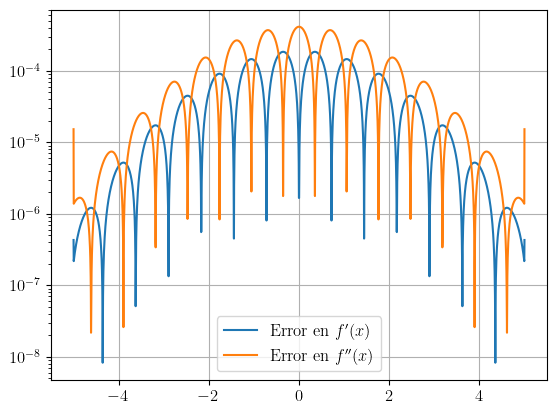

In [150]:
funcs_f = [func_f, f_prima, f_bi_prima]
derivs = [derivada_h2, segunda_derivada_h2]
x1, funcs_eval_f, derivs_eval_f = buscar_Nh_derivs(funcs_f, derivs, -5, 5, checar_cifras_o_diff)
err_df = abs(funcs_eval_f[1] - derivs_eval_f[0])
err_ddf = abs(funcs_eval_f[2] - derivs_eval_f[1])

plt.semilogy(x1,err_df , label=r"Error en $f'(x)$")
plt.semilogy(x1,err_ddf , label=r"Error en $f''(x)$")
plt.grid(), plt.legend(),
plt.show()


En el siguiente caso, el error absoluto entre los valores de la derivada numérica y analítica entre 0.5 y 1 son altos, pero la función `checar_cifras_o_diff` ha revisado que coinciden en las primeras 4 cifras. 

Número de divisiones: 13256 	 h: 0.00033946891973445987


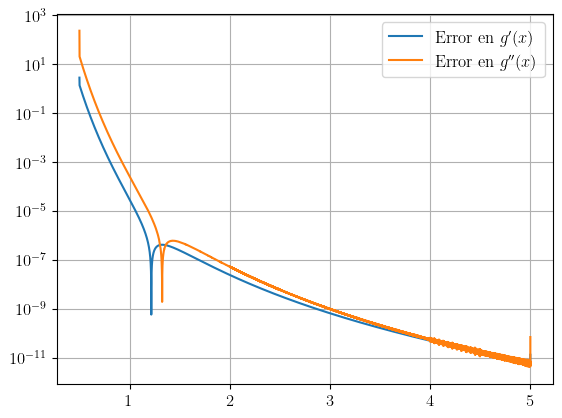

In [144]:
funcs_g = [func_g, g_prima, g_bi_prima]
x2, funcs_eval_g, derivs_eval_g = buscar_Nh_derivs(funcs_g, derivs, 0.5, 5, checar_cifras_o_diff)
err_dg = abs(funcs_eval_g[1] - derivs_eval_g[0])
err_ddg = abs(funcs_eval_g[2] - derivs_eval_g[1])

plt.semilogy(x2,err_dg , label=r"Error en $g'(x)$")
plt.semilogy(x2,err_ddg , label=r"Error en $g''(x)$")
plt.grid(), plt.legend(),
plt.show()

#### Comparación con el algoritmo $h^4$
**Segunda derivada simétrica con error en $h^5$**. Véase: [Wikipedia](https://en.wikipedia.org/wiki/Finite_difference_coefficient)
$$
 f'_i \approx \frac{-f_{i-2} + 16 f_{i-1} - 30f_{i} + 16 f_{i+1} - f_{i+2}}{12 h^2}
$$

Parte asimétrica hacia adelante. Hacia los signos quedan igual

$$
  f'_{i} \approx \frac{45 f_{i} - 154 f_{i+1} + 214 f_{i+2} -156 f_{i+3} + 61 f_{i+4}- 10f_{i+5} }{12 h^2} 
$$

In [155]:
def segunda_derivada_h4(f, x):
    # Puntos intermedios
    hh_12, ddf = 12*(x[1] - x[0])**2, np.zeros_like(f)
    for i in range(2,len(x)-2):
        ddf[i] = - f[i-2] + 16*f[i-1] -30*f[i] + 16*f[i+1] - f[i+2]

    # Extremos del dominio
    ddf[0] = 45*f[0] - 154*f[1] + 214 *f[2] - 156*f[3] + 61*f[4] - 10*f[5]
    ddf[1] = 45*f[1] - 154*f[2] + 214 *f[3] - 156*f[4] + 61*f[5] - 10*f[6]
    ddf[-1] = 45*f[-1] - 154*f[-2] + 214 *f[-3] - 156*f[-4] + 61*f[-5] - 10*f[-6]
    ddf[-2] = 45*f[-2] - 154*f[-3] + 214 *f[-4] - 156*f[-5] + 61*f[-6] - 10*f[-7]

    return ddf / hh_12

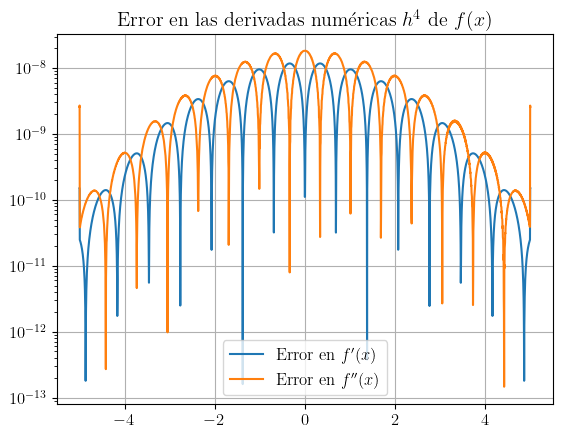

In [157]:
derivs_eval_f_h4 = [derivada_h4(funcs_eval_f[0], x1), segunda_derivada_h4(funcs_eval_f[0], x1)]

err_df_h4 = abs(funcs_eval_f[1] - derivs_eval_f_h4[0])
err_ddf_h4 = abs(funcs_eval_f[2] - derivs_eval_f_h4[1])

plt.title(r"Error en las derivadas numéricas $h^4$ de $f(x)$")
plt.semilogy(x1,err_df_h4, label=r"Error en $f'(x)$")
plt.semilogy(x1,err_ddf_h4, label=r"Error en $f''(x)$")
plt.grid(), plt.legend(),
plt.show()

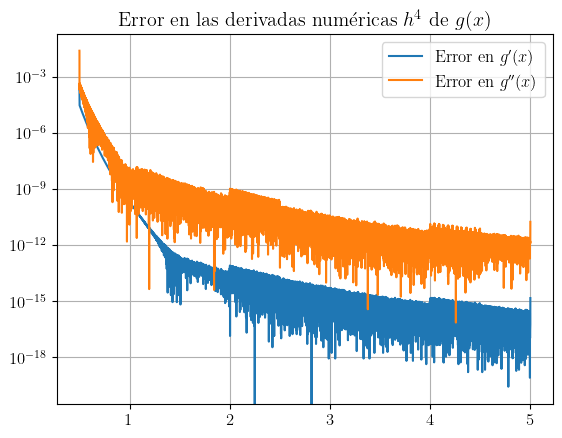

In [159]:
derivs_eval_g_h4 = [derivada_h4(funcs_eval_g[0], x2), segunda_derivada_h4(funcs_eval_g[0], x2)]

err_dg_h4 = abs(funcs_eval_g[1] - derivs_eval_g_h4[0])
err_ddg_h4 = abs(funcs_eval_g[2] - derivs_eval_g_h4[1])

plt.title(r"Error en las derivadas numéricas $h^4$ de $g(x)$")
plt.semilogy(x2,err_dg_h4, label=r"Error en $g'(x)$")
plt.semilogy(x2,err_ddg_h4, label=r"Error en $g''(x)$")
plt.grid(), plt.legend(),
plt.show()

En ambos casos es más que claro que el error de las derivadas numéricas $h^4$ es menor que el de las $h^2$

### Problema 3
Utilizando las funciones $f(x)$ y $g(x)$ del problema anterior, obtenga el valor de la integral de una función despreciando términos iguales o mayores a $h^5$ para una malla uniforme y calcule las siguientes integrales:

* $\int_{0}^{5} f(x)dx$
* $\int_{-5}^{5} f^2(x)dx$
* $\int_{0.5}^{5} g(x)dx$

Muestre que ha podido obtener la integral hasta una precisión de $10^{-3}$, es decir, si hace el valor de $h$ más pequeño se obtiene que las primeras tres cifras significativas son iguales.

In [211]:
def f_cuadrado(x):
    return func_f(x)**2

In [186]:
def checar_cifras(a,b,n=3):
    '''
    Checa si dos números coinciden en las primeras n cifras
    '''
    diff = abs(a-b)
    return diff/(a+1e-20) <= 10**(-n)

In [ ]:
def buscar_Nh_integral(funcs, func_integracion, min_x, max_x ,comp_func, h1=0.5):
    '''
    Obtiene un número de divisiones uniformes para un intervalo [min_x,max_x]
    de manera que los errores en las integrales numéricas respecto a las analíticas
    pasen una prueba comparativa definida por 'comp_func'
    '''
    rango = abs(max_x - min_x)
    Nh = int(rango/h1)

    for i in range(100):
        x = np.linspace(min_x,max_x, Nh)
        # Evaluación analítica
        f_eval = funcs[0](x)
        int_alit = integral_primitiva(funcs[1],min_x,max_x)
        # Evaluación numérica
        int_num = func_integracion(f_eval, x)
        
        # Se checa que cada elemento coincida hasta 
        if comp_func(int_alit, int_num):
            print('Número de divisiones:', Nh, '\t h:',rango/Nh)
            return int_alit, int_num
        
        Nh += (Nh // 10)    
        if (Nh > 100_000): break

    print('Algo salió mal.')
    return None, None

#### Primitivas de $f(x)$, $f^2(x)$ y $g(x)$
$$
F(x) = \frac{\sqrt{\pi } \left(\text{erf}\left(\frac{1}{2} (x-8 i)\right)+\text{erf}\left(\frac{1}{2} (x+8 i)\right)\right)}{2 e^{16}}
$$

$$
F(x)^{(2)} = \frac{\sqrt{\frac{\pi }{2}} \left(2 e^{32} \text{erf}\left(\frac{x}{\sqrt{2}}\right)+\text{erf}\left(\frac{x+8 i}{\sqrt{2}}\right)-i
   \text{erfi}\left(\frac{8+i x}{\sqrt{2}}\right)\right)}{4 e^{32}}
$$

$$
G(x) = \frac{2}{5 x^5}-\frac{1}{11 x^{11}}
$$

In [198]:
def func_F(x):
    return np.real((np.sqrt(np.pi) * (erf(0.5 * (x - 8j)) + erf(0.5 * (x + 8j)))) / (2 * np.exp(16)))

def F_cuadrado(x):
    return np.real((np.sqrt(np.pi / 2) * (2 * np.exp(32) * erf(x / np.sqrt(2)) + erf((x + 8j) / np.sqrt(2)) - 1j * erfi((8 + 1j * x) / np.sqrt(2)))) / (4 * np.exp(32)))

def func_G(x):
    return (2 / (5 * x**5)) - (1 / (11 * x**11))

In [ ]:
funcs_int_f = [func_f, func_F]
int_alit_f, int_num_f = buscar_Nh_integral(funcs_int_f, integral_h4, 0, 5, checar_cifras, 0.5)
print(int_alit_f, int_num_f)

Número de divisiones: 33 	 h: 0.15151515151515152
0.00022327289465797406 0.00022349468800809329


In [ ]:
funcs_int_f_cuadrado = [f_cuadrado, F_cuadrado]
int_alit_f_cuadrado, int_num_f_cuadrado = buscar_Nh_integral(funcs_int_f_cuadrado, integral_h4, -5, 5, checar_cifras, 0.5)
print(int_alit_f_cuadrado, int_num_f_cuadrado)

Número de divisiones: 20 	 h: 0.25
0.6266569052672196 0.6265702178309991


In [214]:
funcs_int_g = [func_g, func_G]
int_alit_g, int_num_g = buscar_Nh_integral(funcs_int_g, integral_h4, 0.5, 5, checar_cifras, 0.2)
print(int_alit_g, int_num_g)

Número de divisiones: 179 	 h: 0.025139664804469275
173.38194617995634 173.53261660713315


### Problema 4
Haga la gráfica de la primitiva de $f(x)$ y $g(x)$ en el problema 2 en los mismos intervalos. Considere que la constante de integración es cero.

In [164]:
def primitiva(f,x,F0=0):
    F , h = np.zeros_like(f) , x[1]-x[0]
    F[0] = F0
    for i in range(len(f)-5):
        F[i+1] = F[i] + (23*f[i] + 26*f[i+1] - 4*f[i+2] + 6*f[i+3] - 3*f[i+4])*h/48
    return F

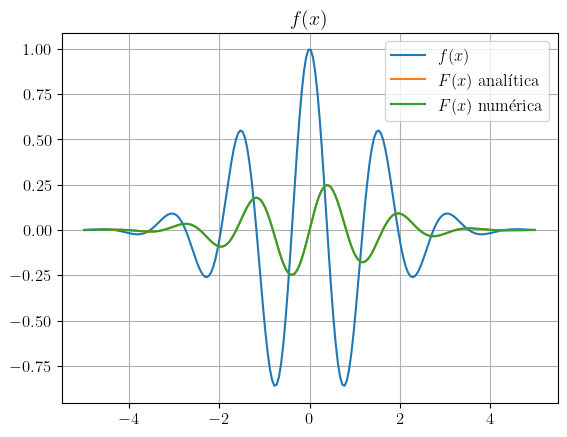

In [ ]:
x = np.linspace(-5,5,200)
f = func_f(x)

F = func_F(x)
F_h4 = primitiva(f,x)

plt.title(r"$f(x)$")
plt.plot(x,f ,label=r"$f(x)$")
plt.plot(x,F ,label=r"$F(x)$ analítica")
plt.plot(x,F_h4, label=r"$F(x)$ numérica")
plt.grid(), plt.legend(), 
plt.show()

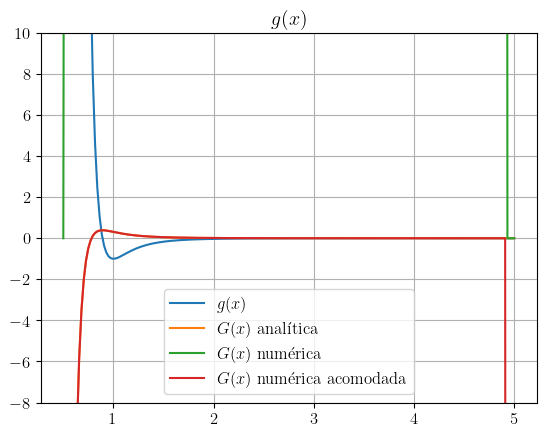

In [181]:
x = np.linspace(0.5,5,200)
g = func_g(x)

G = func_G(x)
G_h4 = primitiva(g,x)
G_h4_2 = G_h4 - max(G_h4) + max(G) # jiji

plt.title(r"$g(x)$")
plt.plot(x,g ,label=r"$g(x)$")
plt.plot(x,G ,label=r"$G(x)$ analítica")
plt.plot(x,G_h4, label=r"$G(x)$ numérica")
plt.plot(x,G_h4_2, label=r"$G(x)$ numérica acomodada")
plt.grid(), plt.legend(), plt.ylim(-8,10)
plt.show()